In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Zomato data .csv")
print(df.head(5))

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### As we can see in rate column the ratings are given out of 5, so we will remove the '/' and value after the '/'.

In [4]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


#### Now we will check is there are any null values present in any of the columns.

In [5]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

#### There are no null values present in  our data.

#### Let's check is the data types of all variable is correct or not.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#### Now let's do some EDA to get some information from the data.

#### Let's determine which type of restaurant is the most common in the total data.

Text(0.5, 0, 'Type of restaurant')

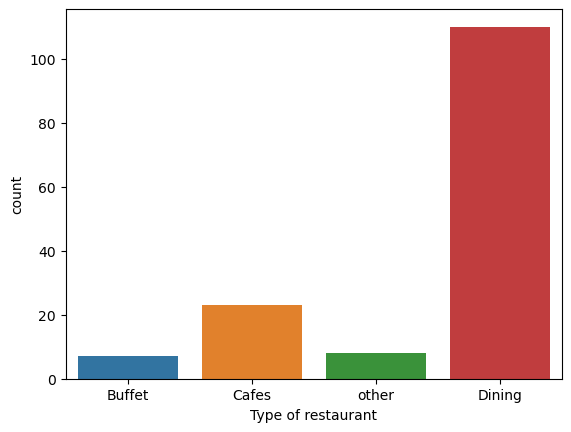

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

#### From the graph we can see that most of the restaurants fall into the dining category.

#### Let's try to find out which type of restaurant is preferred by customers out of all types of restaurants.

Text(0, 0.5, 'Votes')

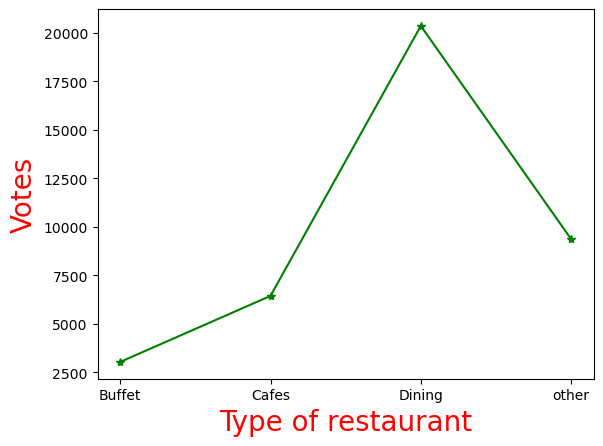

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="*")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

#### From the graph we can see that the dining type of restaurants has received most of the votes, so we can conclude that people preffer dining restaurants over other restaurants.

#### Now we will determine the restaurant’s name that received the maximum votes based on a given data.

In [24]:
restaurant_with_max_votes = df.loc[df['votes'] == df['votes'].max(), 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


#### The 'Empire Restaurant' has received the most votes out of all restaurants.

#### Now we will determine the restaurant's name which has received the highest rating among the all restaurants.

In [28]:
restaurant_with_max_rating = df.loc[df['rate'] == df['rate'].max()]
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_rating)

Restaurant(s) with the maximum votes:
      name online_order book_table  rate  votes  approx_cost(for two people)  \
7   Onesta          Yes        Yes   4.6   2556                          600   
44  Onesta          Yes        Yes   4.6   2556                          600   

   listed_in(type)  
7            Cafes  
44           other  


#### As we can see that the 'Onesta' restaurant has received the highest rating, this restaurant is two type of restaurant one is 'Cafes' and other is 'other' type of restaurant.

#### Now let's try to exlore is restaurants prefer online order or they prefer offline order.

<Axes: xlabel='online_order', ylabel='count'>

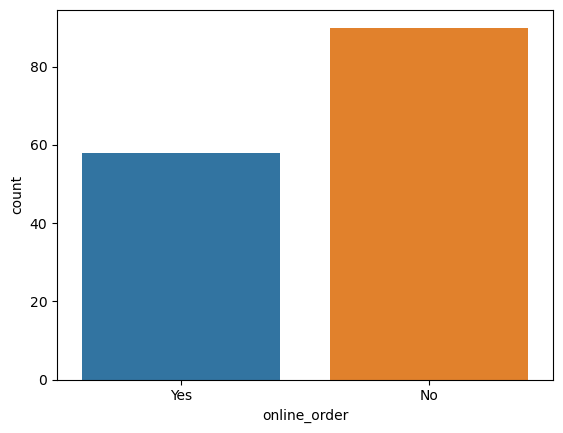

In [31]:
sns.countplot(x=df['online_order'])

#### As we can see that most of the restaurants does not preferred online order mode.

#### Now we will examine whether online orders receive higher ratings than offline orders

<Axes: xlabel='online_order', ylabel='rate'>

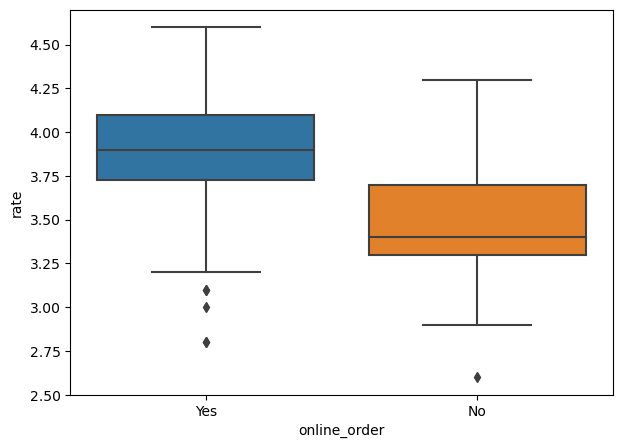

In [36]:
plt.figure(figsize = (7,5))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

#### From the graph we can conclude that the online order has received the higher rating.

#### Let's try to find out which types of restaurants receive orders in which mode—whether they receive orders offline or online.

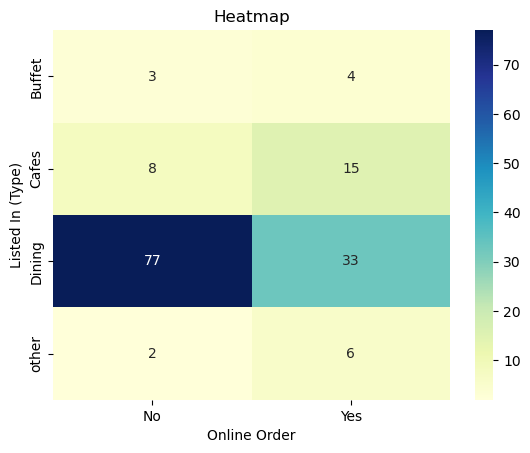

In [39]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

#### Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

#### Let's try to understand the distribution of Ratings of restaturants.

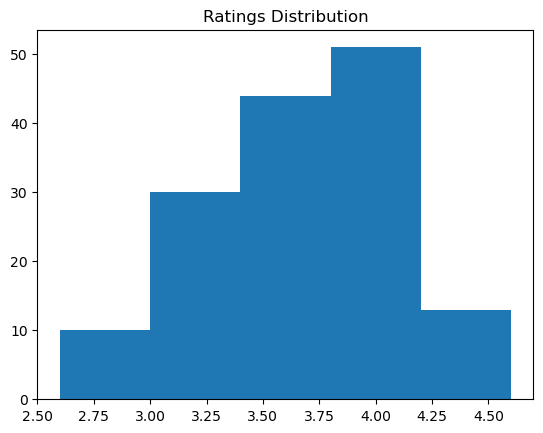

In [43]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

#### The majority of restaurants received ratings ranging from 3.5 to 4.

#### lets try to understand about the pricing of the restaurants.

In [45]:
df['approx_cost(for two people)'].unique()

array([800, 300, 600, 700, 550, 500, 450, 650, 400, 900, 200, 750, 150,
       850, 100, 350, 250, 950], dtype=int64)

#### As there are not so many different types of pricing in this variable, so we can consider these values as category and we can plot the countplot of these values. Which will help us to understand about the pricing of restaurants.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

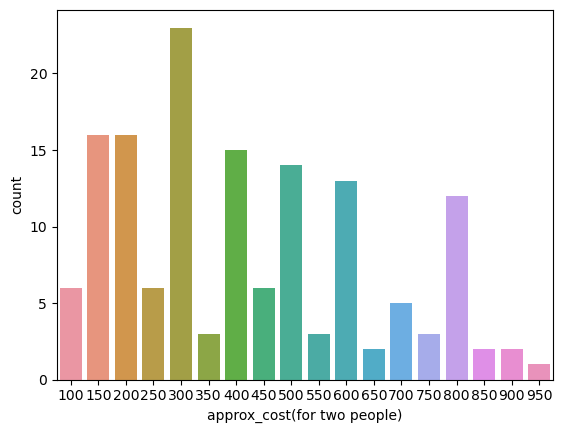

In [49]:
sns.countplot(x=df['approx_cost(for two people)'])

#### The majority of couples prefer restaurants with an approximate cost of 300 rupees.

#### Now we will determine if people book a table before they come to the restaurant.

<Axes: xlabel='book_table', ylabel='count'>

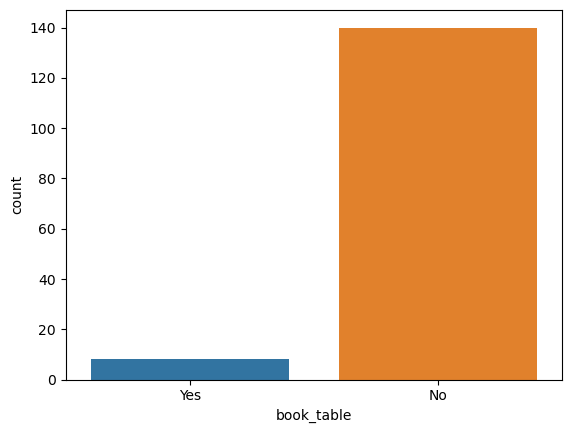

In [56]:
sns.countplot(x=df['book_table'])

#### We can observe that people do not book a table before coming to the restaurant.